In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, linregress
import os
from datetime import datetime
import sys
sys.path.append('/home/wallacelab/complexity-final/Optimizations/Bayesian')

import optimization

In [3]:
# Parameters
num_simulations = 1  # Number of simulations to run
task_name = "complexity_prediction"

# Dynamically generate predictor column names '0' through '48'
predictor_columns = [str(i) for i in range(49)]

In [3]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/advertisement/emb/savoias_advertisement_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/advertisement/emb/savoias_advertisement_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241210_230739
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.10648230488507834
Predictor 1: Initial Spearman rho = 0.01508742302370415
Predictor 2: Initial Spearman rho = -0.08373468495276729
Predictor 3: Initial Spearman rho = -0.012369430432758127
Predictor 4: Initial Spearman rho = -0.020372490018605662
Predictor 5: Initial Spearman rho = -0.00016410521303825045
Predictor 6: Initial Spearman rho = 0.043294471739769864
Predictor 7: Initial Spearman rho = -0.0502235213152867
Predictor 8: Initial Spearman rho = -0.019956366085544384
Predictor 9: Initial Spearman rho = 0.07742102992614389
Predictor 10: Initial Spearman rho = 0.22485637681496418
Predictor 11: Initial Spearman rho = 0.23780457116870546
Predictor 12: Initial Spearman rho = -0.08892597754021839
Predictor 13: Initial Spearman rho = 0.02491029220413657
Predictor 14

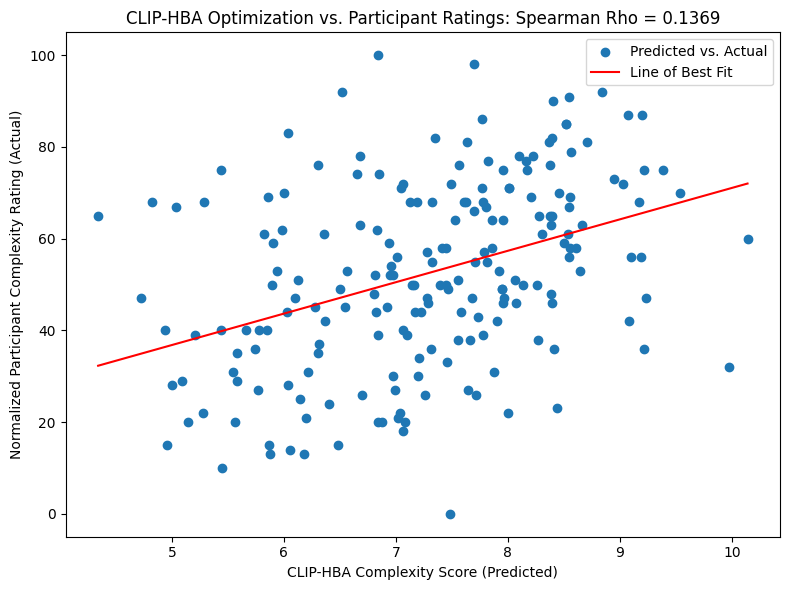

In [4]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/art/emb/savoias_art_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/art/emb/savoias_art_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_012213
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.03305026737048226
Predictor 1: Initial Spearman rho = -0.11626607112001244
Predictor 2: Initial Spearman rho = -0.015455518355215924
Predictor 3: Initial Spearman rho = 0.01148537327828883
Predictor 4: Initial Spearman rho = -0.14238246595545592
Predictor 5: Initial Spearman rho = -0.05526770353711981
Predictor 6: Initial Spearman rho = 0.10963687641173231
Predictor 7: Initial Spearman rho = 0.22744199767532464
Predictor 8: Initial Spearman rho = 0.08169146546362871
Predictor 9: Initial Spearman rho = 0.06369490872252286
Predictor 10: Initial Spearman rho = 0.1299169349333475
Predictor 11: Initial Spearman rho = 0.37454522983334093
Predictor 12: Initial Spearman rho = -0.11236616329909824
Predictor 13: Initial Spearman rho = -0.02745738857242841
Predictor 14: Initi

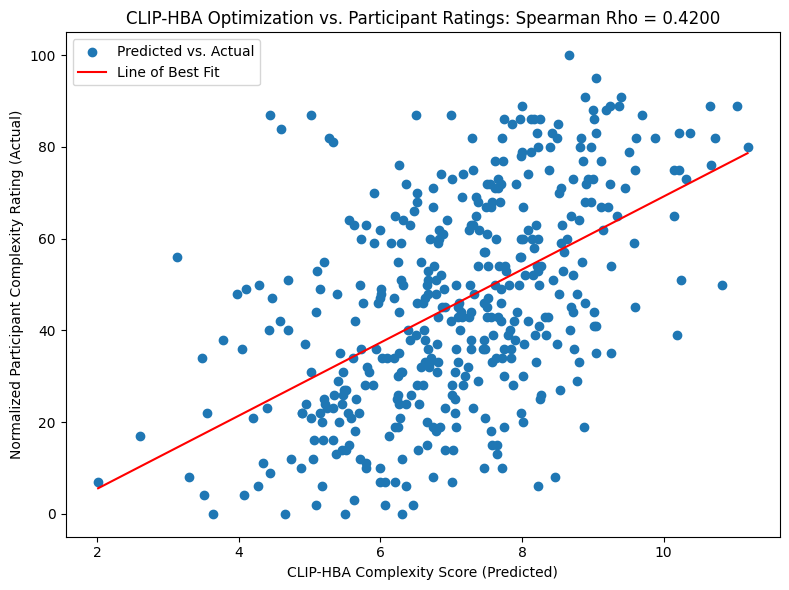

In [6]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/interior_design/emb/savoias_interior_design_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/interior_design/emb/savoias_interior_design_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_032656
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.31244029210489666
Predictor 1: Initial Spearman rho = -0.04014068105646526
Predictor 2: Initial Spearman rho = 0.35255569550557236
Predictor 3: Initial Spearman rho = 0.19431419056977564
Predictor 4: Initial Spearman rho = -0.1776553389981526
Predictor 5: Initial Spearman rho = -0.022708089721487506
Predictor 6: Initial Spearman rho = 0.15738570186420742
Predictor 7: Initial Spearman rho = -0.22803048692444683
Predictor 8: Initial Spearman rho = -0.2049824206402731
Predictor 9: Initial Spearman rho = 0.14249707308450213
Predictor 10: Initial Spearman rho = 0.5815709421288343
Predictor 11: Initial Spearman rho = 0.22330598503608362
Predictor 12: Initial Spearman rho = -0.10277843189895763
Predictor 13: Initial Spearman rho = 0.29529895301731995
Predictor 14: Initial

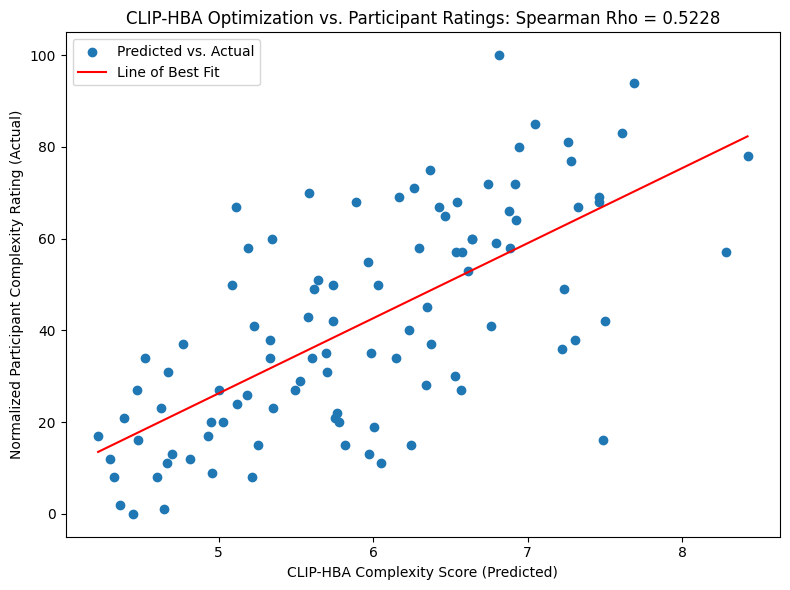

In [8]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/objects/emb/savoias_objects_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/objects/emb/savoias_objects_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_050631
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.23213506619302457
Predictor 1: Initial Spearman rho = -0.0695549498332547
Predictor 2: Initial Spearman rho = -0.27028552393072103
Predictor 3: Initial Spearman rho = -0.01369413442472295
Predictor 4: Initial Spearman rho = 0.09317901674207217
Predictor 5: Initial Spearman rho = -0.06504787113750808
Predictor 6: Initial Spearman rho = 0.19956717341982566
Predictor 7: Initial Spearman rho = 0.3374799718852866
Predictor 8: Initial Spearman rho = 0.10113087502614786
Predictor 9: Initial Spearman rho = 0.08394360808820649
Predictor 10: Initial Spearman rho = -0.015661951943704646
Predictor 11: Initial Spearman rho = 0.25394077007797283
Predictor 12: Initial Spearman rho = 0.13920953599658442
Predictor 13: Initial Spearman rho = 0.040512424856533794
Predictor 14: Initial

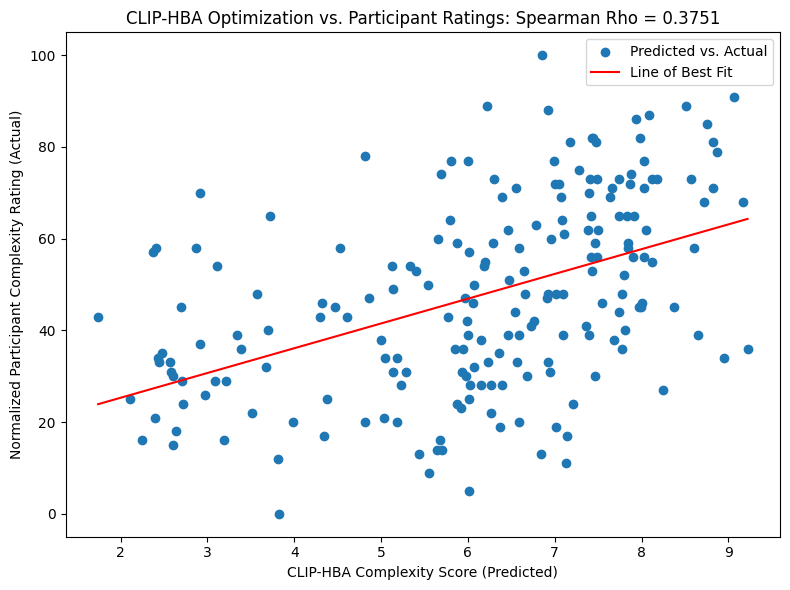

In [10]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/scenes/emb/savoias_scenes_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/scenes/emb/savoias_scenes_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_064829
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.132821657170377
Predictor 1: Initial Spearman rho = 0.039271368898706756
Predictor 2: Initial Spearman rho = -0.24441265638122406
Predictor 3: Initial Spearman rho = 0.13698162942154035
Predictor 4: Initial Spearman rho = 0.0724016868271333
Predictor 5: Initial Spearman rho = -0.24725972439249924
Predictor 6: Initial Spearman rho = -0.3032662264650477
Predictor 7: Initial Spearman rho = 0.07475201986371871
Predictor 8: Initial Spearman rho = -0.07322371727197396
Predictor 9: Initial Spearman rho = 0.16189896937611326
Predictor 10: Initial Spearman rho = 0.35839208629633185
Predictor 11: Initial Spearman rho = 0.3111524436738399
Predictor 12: Initial Spearman rho = 0.11372886448539699
Predictor 13: Initial Spearman rho = -0.027502120176852624
Predictor 14: Initial Sp

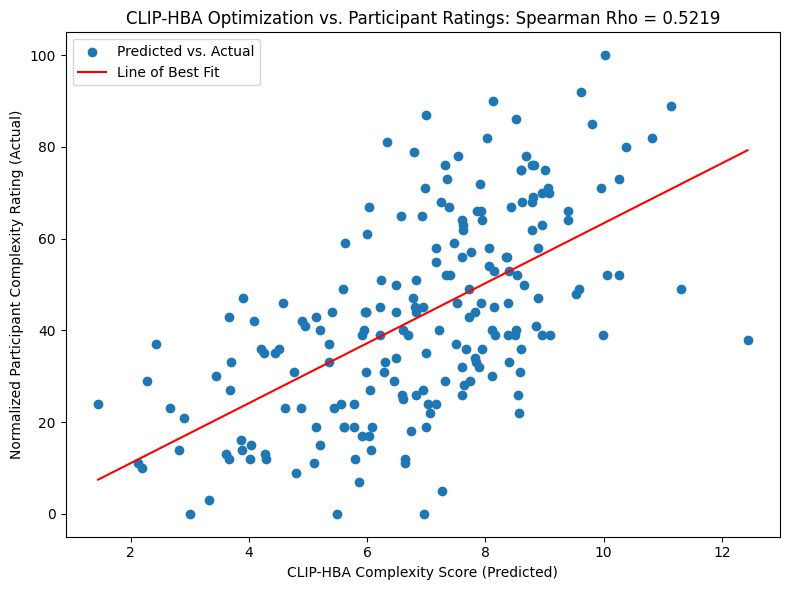

In [12]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/suprematism/emb/savoias_suprematism_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/suprematism/emb/savoias_suprematism_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_083240
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.19374997135532737
Predictor 1: Initial Spearman rho = 0.1030886783327722
Predictor 2: Initial Spearman rho = 0.19095967163473146
Predictor 3: Initial Spearman rho = -0.015651471121829966
Predictor 4: Initial Spearman rho = -0.6353793838558615
Predictor 5: Initial Spearman rho = 0.39297502661619377
Predictor 6: Initial Spearman rho = -0.06990990434417384
Predictor 7: Initial Spearman rho = 0.2932628454243107
Predictor 8: Initial Spearman rho = -0.35851834225135615
Predictor 9: Initial Spearman rho = -0.13421576135034416
Predictor 10: Initial Spearman rho = 0.6085432659548362
Predictor 11: Initial Spearman rho = 0.5644143241551597
Predictor 12: Initial Spearman rho = -0.14416939354692368
Predictor 13: Initial Spearman rho = 0.4866493743790563
Predictor 14: Initial Sp

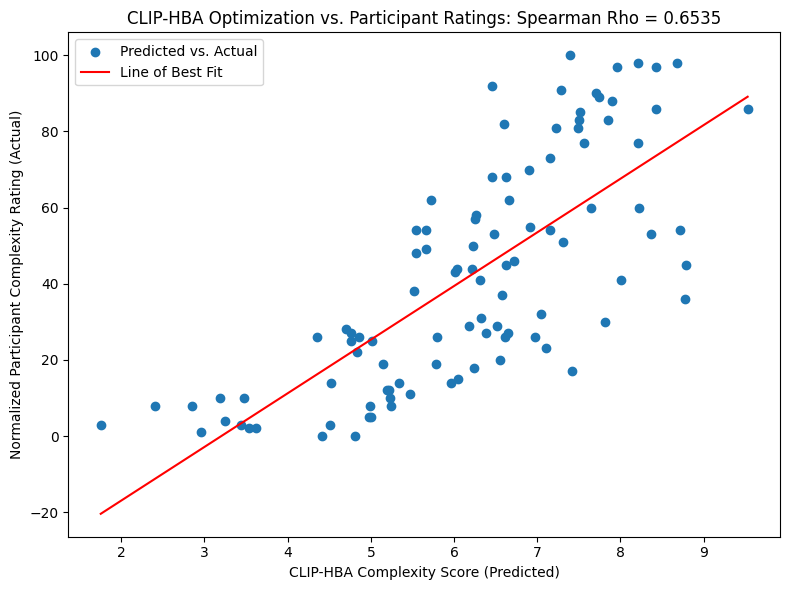

In [14]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/visualizations/emb/savoias_visualizations_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/visualizations/emb/savoias_visualizations_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_101353
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.11358620003693995
Predictor 1: Initial Spearman rho = -0.0685306141882229
Predictor 2: Initial Spearman rho = -0.12619549312705275
Predictor 3: Initial Spearman rho = 0.0023589311962679085
Predictor 4: Initial Spearman rho = 0.09950440641747978
Predictor 5: Initial Spearman rho = 0.1169517062219259
Predictor 6: Initial Spearman rho = 0.03025878699709618
Predictor 7: Initial Spearman rho = -0.06028314604922163
Predictor 8: Initial Spearman rho = 0.05891613809511109
Predictor 9: Initial Spearman rho = -0.0176348421604227
Predictor 10: Initial Spearman rho = 0.12051794133479306
Predictor 11: Initial Spearman rho = 0.18786615957556985
Predictor 12: Initial Spearman rho = 0.047697295753605894
Predictor 13: Initial Spearman rho = 0.04207102507430853
Predictor 14: Initial 

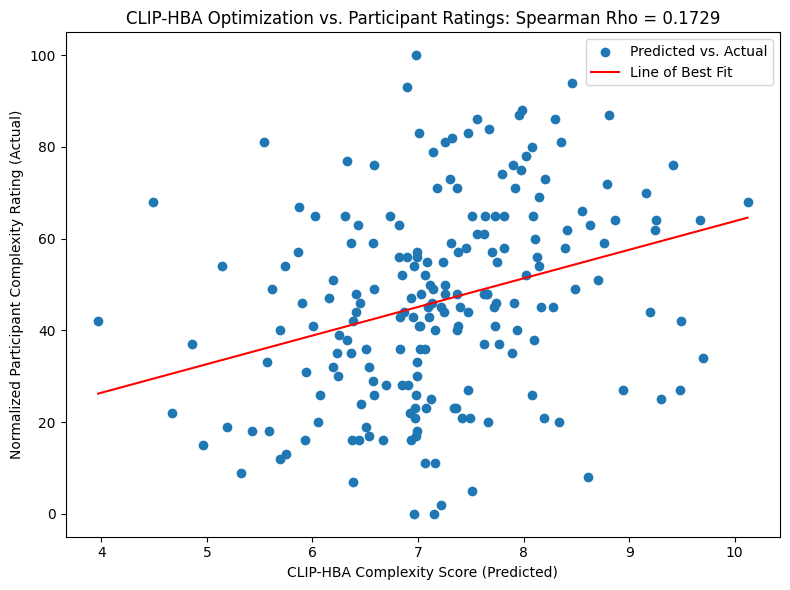

In [16]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/objects/emb/savoias_objects_hba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Savoias/objects/emb/savoias_objects_hba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_221650
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.23213506619302457
Predictor 1: Initial Spearman rho = -0.0695549498332547
Predictor 2: Initial Spearman rho = -0.27028552393072103
Predictor 3: Initial Spearman rho = -0.01369413442472295
Predictor 4: Initial Spearman rho = 0.09317901674207217
Predictor 5: Initial Spearman rho = -0.06504787113750808
Predictor 6: Initial Spearman rho = 0.19956717341982566
Predictor 7: Initial Spearman rho = 0.3374799718852866
Predictor 8: Initial Spearman rho = 0.10113087502614786
Predictor 9: Initial Spearman rho = 0.08394360808820649
Predictor 10: Initial Spearman rho = -0.015661951943704646
Predictor 11: Initial Spearman rho = 0.25394077007797283
Predictor 12: Initial Spearman rho = 0.13920953599658442
Predictor 13: Initial Spearman rho = 0.040512424856533794
Predictor 14: Initial